<a href="https://colab.research.google.com/github/SubhadipGhosh07/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Project Title: Sentiment Analysis : Predicting sentiment of COVID-19 tweets</b>

### <b>Problem Description:</b>

Our objective is to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.

We are given the following information:
* Location: (Location of the user)
* Tweet At: (Date at which the tweet was made)
* Original Tweet: (The exact tweet)
* Sentiment: (Sentiment of the tweet)

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <b>Basic Data Inspection:</b>
* Reading our dataset
* Checking Duplicate records
* Checking Null/Missing values
* Checking the Location of users

In [ ]:
# Reading our dataset
df = pd.read_csv(r"C:\Users\Subho\Downloads\Copy of Coronavirus Tweets.csv", encoding = 'latin-1')
pd.set_option('display.max_columns', None)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Printing the shape of our dataset
print("Rows: {}, columns: {}".format(df.shape[0], df.shape[1]))

Rows: 41157, columns: 6


In [ ]:
# Checking duplicated records
df.duplicated(subset=['UserName']).sum()

0

### <b>Checking Null Values (Missing Values) in our dataset:

In [ ]:
# Checking Nan Values in our dataset
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'crest')

NameError: ignored

### <b>Checking the Location of most users:

<AxesSubplot:>

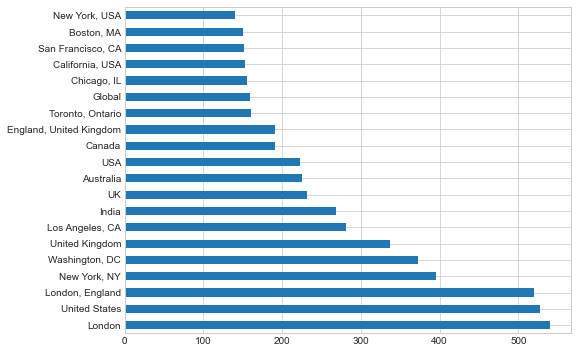

In [ ]:
# Locations of users
plt.figure(figsize = (8,6))
df['Location'].value_counts().head(20).plot(kind = 'barh')

In [ ]:
# Creating a copy to our dataset
data = df.copy()
# Removing the 'Location' column
data.drop('Location', axis = 1, inplace = True)

In [ ]:
# We can remove the column 'ScreenName'
data.drop('ScreenName', axis = 1, inplace = True)

In [ ]:
data.head(5)

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## <b>Labeling our response feature 'Sentiment':</b>
* Combining 'Positive' and 'Extremely Positive' sentiment as 1
* Combining 'Negative' and 'Extremely Negative' sentiment as 2
* Changing the labbel of 'Neutral' as 0

In [ ]:
# Changing sentiment labels
# Combining Positive and extremely positive class labels
# Combining Negative and extremely negative class labels

def sentiment_label(tweet):
    if tweet=='Neutral':
        return 0
    elif (tweet=='Positive') or  (tweet=='Extremely Positive'):
        return 1
    else:
        return 2
    
data['Sentiment']=data['Sentiment'].apply(sentiment_label)

Text(0.5, 1.0, 'Counts of Sentiments')

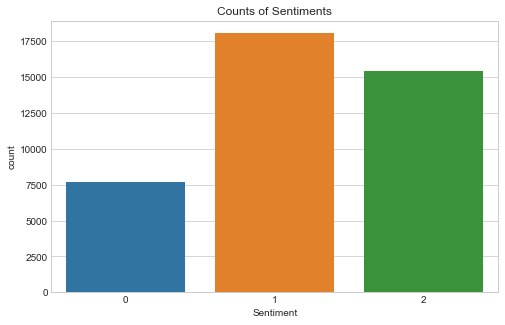

In [ ]:
# Plotting the counts of Sentiment
plt.figure(figsize=(8,5))
sns.countplot('Sentiment', data =data)
plt.title("Counts of Sentiments")

Conclusion:
The number of Positive sentiments are just over 17500 and Negative sentiments are over 15000.
We have very less number of Neutral Sentiments to work with which are only 7500 in counts

# <b>Text Pre-processing:</b>
* Importing nltk libraries
* Removing punctuations,numerical and other special characters
* Removing stopwords
* Using PorterStemmer to convert words into their root forms
* Storing all the cleaned tweets in a list naming it 'corpus'
* Counting the number of words in our corpus and plot it in a distribution plot

In [ ]:
# Checking our dataset
data.head()

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,16-03-2020,"Me, ready to go at supermarket during the #COV...",2


In [ ]:
# dropping the date column as it won't be of use to us
data.drop('TweetAt',axis=1,inplace=True)

In [ ]:
# Importing Nltk libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import nltk
ps = PorterStemmer()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Checking the first tweet in our dataset
data.loc[0, 'OriginalTweet'].split()

['@MeNyrbie',
 '@Phil_Gahan',
 '@Chrisitv',
 'https://t.co/iFz9FAn2Pa',
 'and',
 'https://t.co/xX6ghGFzCC',
 'and',
 'https://t.co/I2NlzdxNo8']

In [ ]:
# Storing all the cleaned tweets in a list
corpus=[]
for i in range(len(data)):
    tweet=data.loc[i, 'OriginalTweet']
    tweet=' '.join([word for word in tweet.split() if word[0:5]!='https'])
    substitute = re.sub("[^a-zA-Z]",' ',tweet)
    substitute=substitute.lower()
    final_tweet= ' '.join([ps.stem(word) for word in substitute.split() if word not in stopwords.words("english")])
    corpus.append(final_tweet)

In [ ]:
# Printing the first tweets from our corpus
corpus[:10]

['menyrbi phil gahan chrisitv',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak',
 'food stock one empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener',
 'readi go supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report',
 'cashier groceri store share insight covid prove credibl comment civic class know talk',
 'supermarket today buy toilet paper rebel toiletpapercrisi covid',
 'due covid retail store classroom atlanta o

Text(0.5, 1.0, 'Box-Plot of Word Counts')

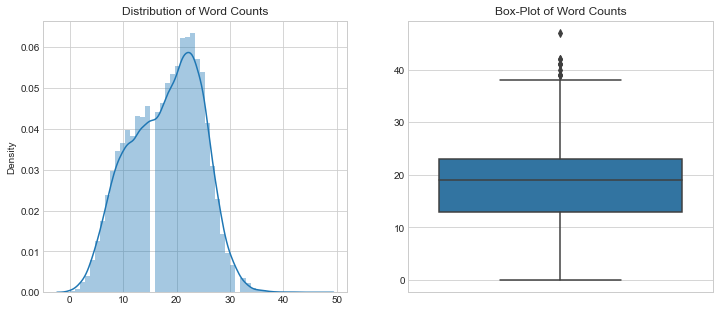

In [ ]:
# Counting the number of words in each tweet
corpus_word_count = [len(i.split()) for i in corpus]

# Plotting the length of words in a histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(corpus_word_count, hist=True)
plt.title("Distribution of Word Counts")

plt.subplot(1,2,2)
sns.boxplot(y=corpus_word_count)
plt.title("Box-Plot of Word Counts")

**Conclusion**: 

Our distribution is very close to being normally distributed with only a few outliers when it comes to word counts.

In [ ]:
# Info of our corpus
print("Max word counts of a tweet: {}".format(max(corpus_word_count)))
print("Min word counts of a tweet: {}".format(min(corpus_word_count)))

Max word counts of a tweet: 47
Min word counts of a tweet: 0


## <b>Removing certain tweets:</b>
* Removing those tweets having word count less than 5 and greater than 30

In [ ]:
# Our dataset
data['word_count']=corpus_word_count
data.head()

,UserName,OriginalTweet,Sentiment,word_count
0,3799,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,4
1,3800,advice Talk to your neighbours family to excha...,1,27
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12
3,3802,My food stock is not the only one which is emp...,1,23
4,3803,"Me, ready to go at supermarket during the #COV...",2,21


In [ ]:
# Describing word counts
data['word_count'].describe()

count    41157.000000
mean        18.030517
std          6.625369
min          0.000000
25%         13.000000
50%         19.000000
75%         23.000000
max         47.000000
Name: word_count, dtype: float64

In [ ]:
# Removing tweets having word counts less than 5 and more than 30
tweets=data.copy()
tweets=tweets[tweets['word_count']>5]
tweets=tweets[tweets['word_count']<=30]
tweets.head()

,UserName,OriginalTweet,Sentiment,word_count
1,3800,advice Talk to your neighbours family to excha...,1,27
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12
3,3802,My food stock is not the only one which is emp...,1,23
4,3803,"Me, ready to go at supermarket during the #COV...",2,21
5,3804,As news of the regionÂs first confirmed COVID...,1,27


In [ ]:
# Info about our dataset
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39479 entries, 1 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       39479 non-null  int64 
 1   OriginalTweet  39479 non-null  object
 2   Sentiment      39479 non-null  int64 
 3   word_count     39479 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Updating the corpus
corpus=[i for i in corpus if len(i.split())>5]
corpus=[i for i in corpus if len(i.split())<=30]

In [ ]:
# Length of our list
len(corpus)

39479

In [ ]:
tweets.head()

,UserName,OriginalTweet,Sentiment,word_count
1,3800,advice Talk to your neighbours family to excha...,1,27
2,3801,Coronavirus Australia: Woolworths to give elde...,1,12
3,3802,My food stock is not the only one which is emp...,1,23
4,3803,"Me, ready to go at supermarket during the #COV...",2,21
5,3804,As news of the regionÂs first confirmed COVID...,1,27


Text(0.5, 1.0, 'Counts of Sentiments after cleaning dataset')

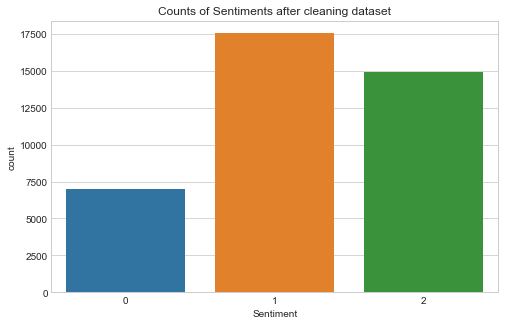

In [ ]:
# Plotting the counts of Sentiment
plt.figure(figsize=(8,5))
sns.countplot('Sentiment', data =tweets)
plt.title("Counts of Sentiments after cleaning dataset")

## <b>Setting up our dataset before passing our dataset into LSTM:</b>
* Setting up our vocabulary
* One hot representing using one_hot from Keras
* Padding our tweets to get all the tweets of equal word counts
* Embedding our padded-tweets

In [ ]:
# Importing tensorflow libraries for using LSTM
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
# Vocabulary size
vocab_size=10000

In [ ]:
# One hot representation
one_hot_repr=[one_hot(ii,vocab_size) for ii in corpus]

In [ ]:
# Padding our words using pad_sequences
sentence_length = 30
embed_tweets=pad_sequences(one_hot_repr, padding='pre', maxlen=sentence_length)
print(embed_tweets[:4])

[[   0    0    0 8585 5695 2533 1307  334 2685 9202 3213 3834 5663 2685
  9202 2533 2794 9370 3075 2359 7028 1706 6803  554 4686 3942 6741 3650
  3531 8336]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  501 2708 5178 8511 8468 8779 1905 6803 6923 1438
  8555 1868]
 [   0    0    0    0    0    0    0 8437 3447 2999 3655 4204  768 2365
  8437 2042 4760 5050 3081 2692 3081 1111 8555 2764 8555 8555  501 5068
  6716  358]
 [   0    0    0    0    0    0    0    0    0 9160 6036 7907 8555 1868
   548 8437 3447 4536 3655  501 8526 3064 4204  768 9184  343 5748 2182
  1635 5068]]


## <b>Setting up our LSTM Network:</b>
* Setting input dimensions
* Setting up our LSTM model
* Adding Dropout layers to prevent overfitting

In [ ]:
# Creating our LSTM model

# Number of input dimensions
number_of_features=50

# Initialising model
model=Sequential()
model.add(Embedding(vocab_size, number_of_features, input_length=30))
model.add(Dropout(0.25))

# Adding LSTM layer
model.add(LSTM(100))
model.add(Dropout(0.25))

# Adding Dense outplut layer
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metric='roc')

In [ ]:
# Printing summary of model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 30, 50)            500000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
Total params: 560,703
Trainable params: 560,703
Non-trainable params: 0
_________________________________________________________________


## <b>Fitting and then evaluating our model:</b>
* Splitting our data into train and test
* Prediction of our test data
* Evaluating our model using classification report and confusion matrix

In [ ]:
# Defining X and y
X=np.array(embed_tweets)
y=np.array(tweets['Sentiment'])

# Train-test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# Fitting our model
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64)

Train on 29609 samples, validate on 9870 samples
Epoch 1/10
29609/29609 [==============================] - 16s 526us/sample - loss: 0.7734 - val_loss: 0.6126
Epoch 2/10
29609/29609 [==============================] - 12s 405us/sample - loss: 0.5263 - val_loss: 0.5900
Epoch 3/10
29609/29609 [==============================] - 12s 396us/sample - loss: 0.4568 - val_loss: 0.6309
Epoch 4/10
29609/29609 [==============================] - 12s 395us/sample - loss: 0.4161 - val_loss: 0.6404
Epoch 5/10
29609/29609 [==============================] - 12s 397us/sample - loss: 0.3820 - val_loss: 0.6679
Epoch 6/10
29609/29609 [==============================] - 12s 404us/sample - loss: 0.3442 - val_loss: 0.6857
Epoch 7/10
29609/29609 [==============================] - 12s 389us/sample - loss: 0.3047 - val_loss: 0.7548
Epoch 8/10
29609/29609 [==============================] - 12s 397us/sample - loss: 0.2690 - val_loss: 0.8657
Epoch 9/10
29609/29609 [==============================] - 12s 402us/sample - lo

In [ ]:
# Predicting our test data
y_pred=model.predict_classes(X_test)

In [ ]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 992,  298,  385],
       [ 308, 3376,  718],
       [ 255,  562, 2976]], dtype=int64)

In [ ]:
# Confusion report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      1675
           1       0.80      0.77      0.78      4402
           2       0.73      0.78      0.76      3793

    accuracy                           0.74      9870
   macro avg       0.72      0.71      0.72      9870
weighted avg       0.74      0.74      0.74      9870



## <b>Evaluation Summary:</b>

* From the confusion matrix, we observe that our model has correctly predicted 992 of the neutral sentiments, 3376 of our positive sentiments and 2976 of our negative sentiments
* We have achieved an overall precision of 0.80 and 0.73 for Postive and negative sentiments respectively. And 0.64 for neutral sentiments which is'nt bad either as firstly, we had less data with neutral sentiments and it's quite difficult for the model to predict neutral sentiments
* Overall accuracy of our model is 0.74
* Considering both recall and precision, we have a f1 score of 0.61, 0.78 and 0.76 for neutral, positive and negative sentiments. Overall, our LSTM has worked well in predicting sentiments of these tweets